# Introduction: Machine Learning Project Part 1: Naive Bayes Classification for Content Moderation

![Naive Bayes Classification](naive.png)

In this segment of our comprehensive machine learning project, we are delving into the crucial task of content moderation in digital communication platforms. Our objective is to develop a model capable of identifying and flagging potentially harmful content, a necessity in today's era of expansive digital interactions. This project represents a supervised classification challenge in machine learning.

In the initial phase of our project, we have embarked on several critical steps in the machine learning pipeline, tailored to address the nuances of content moderation:

1. Data Cleaning and Preprocessing: Preparing the Jigsaw Toxic Comment Classification Dataset for analysis, including text normalization and removal of non-essential elements.

2. Exploratory Data Analysis: Understanding the characteristics of the dataset, including the distribution of different classes of toxicity.

3. Feature Extraction: Implementing techniques like TF-IDF to convert textual data into a format suitable for machine learning algorithms.

4. Model Building: Focusing on the Naive Bayes classifier to establish a baseline for our content moderation model.

5. Model Training and Evaluation: Assessing the performance of our model using appropriate metrics, such as accuracy and F1-score, to gauge its effectiveness in classifying toxic comments.

6. Interpreting Results: Analyzing the outcomes of our model to understand its decision-making process.

In this notebook, we will concentrate on the implementation and evaluation of the Naive Bayes classifier. This model, known for its simplicity and effectiveness in text classification tasks, serves as our starting point in the quest to tackle online toxicity. We aim to explore its strengths and limitations in handling the complexities of content moderation.

The subsequent parts of the project will expand upon more sophisticated models and techniques, enhancing our ability to moderate digital content effectively. As we progress, we will document our findings and methodologies, culminating in a comprehensive and insightful report.

# Imports
We will use a familiar stack of data science and machine learning libraries.

In [1]:
# Pandas for data manipulation
import pandas as pd

# Regular expressions for text processing
import re

# Sklearn model_selection for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# TfidfVectorizer for converting text data into numerical form
from sklearn.feature_extraction.text import TfidfVectorizer

# NLTK for natural language processing tasks
import nltk

# nltk.download('stopwords')
# nltk.download('punkt')

# Stopwords and tokenization functions from NLTK
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# MultinomialNB for Naive Bayes classification
from sklearn.naive_bayes import MultinomialNB

# LinearSVC for Support Vector Machine classification
from sklearn.svm import LinearSVC

# LogisticRegression for logistic regression modeling
from sklearn.linear_model import LogisticRegression

# Sklearn metrics for model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, multilabel_confusion_matrix

# Matplotlib for plotting and data visualization
import matplotlib.pyplot as plt

# Numpy for numerical and array operations
import numpy as np


# Data Preprocessing

Data preprocessing is a critical step in our machine learning pipeline. For text data, especially in content moderation, it's essential to normalize the text to ensure consistency. This process includes:

- Converting text to lowercase to maintain uniformity.
- Removing URLs as they often don't contribute to text classification.
- Eliminating non-alphanumeric characters which might introduce noise in the data.
- Stripping extra white spaces for clean, concise text data.

These steps help in creating a standardized dataset, ready for feature extraction and model training.


In [2]:
# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    cleaned_text = ' '.join([word for word in words if word not in stop_words])
    return cleaned_text.strip()  # Strip spaces after processing

def preprocess_text(text: str):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text).strip()  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).strip()  # Remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra white spaces
    text = remove_stopwords(text) # Remove stop_words from the NLTK library
    
    text = text.strip() # remove extra spaces
    return text

def preprocess_data(series: pd.Series):
    series = series.apply(preprocess_text)
    return series


# Loading and Preprocessing data

In [4]:
train_file_path = 'train.csv'
train_data = pd.read_csv(train_file_path)

train_data['comment_text'] = preprocess_data(train_data['comment_text'])
train_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww matches background colour im seemingly st...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time asking view completely contradicts...,0,0,0,0,0,0
159567,ffea4adeee384e90,ashamed horrible thing put talk page 128611993,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres actual article prostitution...,0,0,0,0,0,0
159569,fff125370e4aaaf3,looks like actually put speedy first version d...,0,0,0,0,0,0


In [5]:
test_file_path = 'data/test.csv'  # Replace with the actual path to your test.csv file
test_label_path = 'data/test_labels.csv'
test_data = pd.read_csv(test_file_path)
test_labels = pd.read_csv(test_label_path)

test_data['comment_text'] = preprocess_data(test_data['comment_text'])
test_data

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule succesful youll ever whats ha...
1,0000247867823ef7,rfc title fine imo
2,00013b17ad220c46,sources zawe ashton lapland
3,00017563c3f7919a,look back source information updated correct f...
4,00017695ad8997eb,dont anonymously edit articles
...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing toolongcrap
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...
153161,fffda9e8d6fafa9e,okinotorishima categories see changes agree co...
153162,fffe8f1340a79fc2,one founding nations eu germany law return qui...


# Feature Extraction: TF-IDF Vectorization

Feature extraction is crucial for converting our textual data into a numerical format that our machine learning models can understand. We use TF-IDF (Term Frequency-Inverse Document Frequency) vectorization, which reflects the importance of a word in a corpus. TF-IDF increases proportionally to the number of times a word appears in a document but is offset by the frequency of the word in the corpus. This helps in handling the most common problem in text data - the variance in word frequency.


In [10]:
# Merge/join the dataframes based on the 'id' column
merged_data = pd.merge(test_data, test_labels, on='id')

# there are alot of comments that are not givien any labels so just filtering those out
filtered_data = merged_data[merged_data.iloc[:, 2:].sum(axis=1)>=0] 

# Separate the merged data into x_test and y_test
x_test = filtered_data[['id', 'comment_text']]
y_test = filtered_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].to_numpy()

X_test_tfidf = tfidf_vectorizer.transform(x_test['comment_text'])


# Print x_test and y_test to verify the structure
print(f"Shape: {x_test.shape}")
print("x_test:")
print(x_test.head())
print("\ny_test:")
print(y_test)


Shape: (63978, 2)
x_test:
                  id                                       comment_text
5   0001ea8717f6de06  thank understanding think highly would revert ...
7   000247e83dcc1211                             dear god site horrible
11  0002f87b16116a7f  somebody invariably try add religion really me...
13  0003e1cccfd5a40a  says right type type institution needed case t...
14  00059ace3e3e9a53  adding new product list make sure relevant add...

y_test:
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [1 0 1 0 1 0]
 [0 0 0 0 0 0]]


# Splitting Data for Analysis

Before building our models, it's important to understand the distribution of data across different categories. This helps us identify any imbalances which can significantly impact model performance. We'll visualize the number of comments per category and analyze the label distribution. Understanding these aspects is crucial for making informed decisions in the subsequent stages of model training and evaluation.


Text(0.5, 0, 'category')

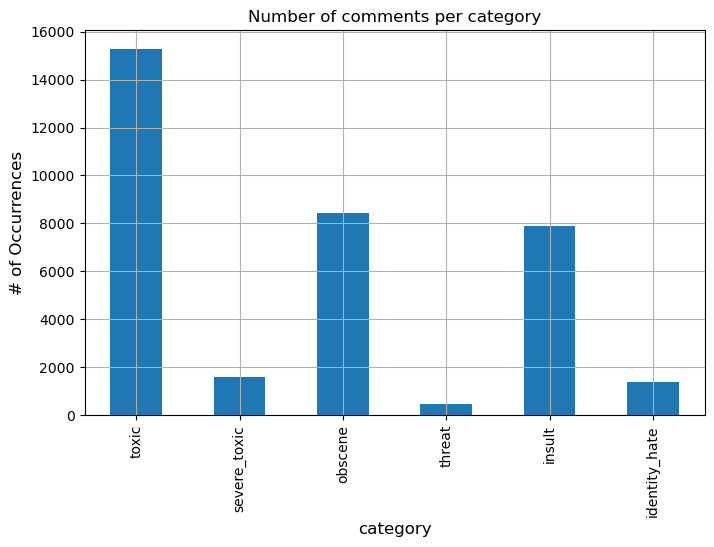

In [6]:
# reference from https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5
# to visualize the number of comments per category
df_stats = train_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()
df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)
# this show that it is very imablannced dataset

In [7]:
# After analyzing the above setup, it hit us that they don't add up to the total number of comments
# It means some comments are untagged/unlabeled
labels_per_comment = train_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)
labels_per_comment.value_counts()
# This shows that most of the comments have 0 labels
# This can be explained by the fact that most of the comments are not labeled means they are not toxic in anyway
# can be considered as a negative class.

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

In [8]:
# Splitting the training data into training and validation sets (85% - 15%)
train_data, val_data = train_test_split(train_data, test_size=0.15, random_state=42)
train_data.shape, val_data.shape

((135635, 8), (23936, 8))

# Initializing TF-IDF Vectorizer

After splitting the data, we initialize the TF-IDF Vectorizer. This vectorizer will transform the text comments into a format that's suitable for model input. TF-IDF helps in reflecting the importance of words in relation to the document and the entire corpus, which is vital for effective text classification.


In [9]:
# Initialize the TF-IDF Vectorizer for the training data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['comment_text'])
X_val_tfidf = tfidf_vectorizer.transform(val_data['comment_text'])
y_train = train_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].to_numpy()
y_val = val_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].to_numpy()

In [13]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [15]:
def eval(clf,X, Y, categories):
    eval_metrics = {"acc": {}, "f1": {}}
    predictions = clf.predict(X)
    for i, category in enumerate(categories):
        eval_metrics["acc"][category] = accuracy_score(Y[:, i], predictions[:, i])
        eval_metrics["f1"][category] = f1_score(Y[:, i], predictions[:, i])

    return pd.DataFrame(eval_metrics)

def fit_eval(clf, categories, X_train, y_train, X_val, y_val):
    clf.fit(X_train, y_train)
    return eval(clf, X_val, y_val, categories)

# Model Fitting and Evaluation

Now, we will fit our models to the training data and evaluate them using the validation set. We are employing a OneVsRestClassifier with different underlying algorithms: Naive Bayes, Logistic Regression, and LinearSVC. This approach is suitable for multi-label classification tasks like ours. After training, we will evaluate each model's performance using accuracy and F1-score, focusing on the latter due to the imbalanced nature of our dataset.

Naive Bayes:
- Here F1-scores are low because of the imbalanced dataset
- This show how the imbalance in the data affects our naive bayes model's performance

In [16]:
# Define a pipeline combining a text feature extractor with multi lable classifier
clf_naive =  OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

eval_metrics = fit_eval(clf_naive, categories, X_train_tfidf, y_train, X_val_tfidf, y_val)
eval_metrics

,acc,f1
toxic,0.920914,0.280502
severe_toxic,0.990600,0.000000
obscene,0.952081,0.188252
threat,0.997786,0.000000
insult,0.952081,0.072757
identity_hate,0.990516,0.000000


Logistic Regression:
- Here F1-scores are also low because of the imbalanced dataset
- This show how the imbalance in the data affects our logistic regression model's performance
- But it is still much better than Naive Bayes Classifier

In [17]:
# Here we define a pipeline combining a text feature extractor with multi lable classifier
clf_log =  OneVsRestClassifier(LogisticRegression())
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

eval_metrics = fit_eval(clf_log, categories, X_train_tfidf, y_train, X_val_tfidf, y_val)
eval_metrics

/home/junaid/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,acc,f1
toxic,0.957595,0.729261
severe_toxic,0.991018,0.354354
obscene,0.976270,0.733583
threat,0.997911,0.242424
insult,0.970296,0.630265
identity_hate,0.991352,0.241758


SVC:
- Here F1-scores are also low because of the imbalanced dataset
- But SVC is still much better than Naive Bayes Classifier and logistic model

In [18]:
# Here we define a pipeline combining a text feature extractor with multi lable classifier
clf_svc =  OneVsRestClassifier(LinearSVC())
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

eval_metrics = fit_eval(clf_svc, categories, X_train_tfidf, y_train, X_val_tfidf, y_val)
eval_metrics

/home/junaid/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/junaid/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/junaid/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/junaid/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress th

,acc,f1
toxic,0.960812,0.768852
severe_toxic,0.990642,0.370787
obscene,0.979403,0.785745
threat,0.997953,0.363636
insult,0.972468,0.681796
identity_hate,0.991895,0.370130


- From the above methods, Linear SVC performed the best
- Let's run it on the test data
- In the below cell we use a sample hate sentence for see the output of the model
- Used all the bad words we know for the sake of testing only XD

In [20]:
text = "I hope you all have a wonderful day and achieve great success in your endeavors."

demo = tfidf_vectorizer.transform([preprocess_text(text)])
pred = clf_svc.predict(demo)
pred


array([[1, 0, 0, 0, 1, 1]])

In [22]:
eval(clf_svc, X_test_tfidf, y_test, categories)

,acc,f1
toxic,0.927397,0.671337
severe_toxic,0.992732,0.351464
obscene,0.963472,0.681998
threat,0.996639,0.380403
insult,0.961831,0.611765
identity_hate,0.990372,0.406551


# Prediction and Evaluation on Test Data

After training and evaluating our models on the validation set, we will use them to predict labels on the test set. We use the **SVC Classifier** because it gave us the best result out of all. This step is crucial for understanding how our models perform on unseen data. We will use classification reports and confusion matrices to assess the performance in a detailed manner, providing insights into each category's prediction accuracy.

In [23]:
preds = clf_svc.predict(X_test_tfidf)
print(classification_report(y_test, preds, target_names=categories))
print(multilabel_confusion_matrix(y_test, preds))

               precision    recall  f1-score   support

        toxic       0.59      0.78      0.67      6090
 severe_toxic       0.36      0.34      0.35       367
      obscene       0.69      0.68      0.68      3691
       threat       0.49      0.31      0.38       211
       insult       0.67      0.56      0.61      3427
identity_hate       0.65      0.30      0.41       712

    micro avg       0.62      0.66      0.64     14498
    macro avg       0.57      0.50      0.52     14498
 weighted avg       0.63      0.66      0.63     14498
  samples avg       0.07      0.06      0.06     14498

[[[54589  3299]
  [ 1346  4744]]

 [[63387   224]
  [  241   126]]

 [[59135  1152]
  [ 1185  2506]]

 [[63697    70]
  [  145    66]]

 [[59612   939]
  [ 1503  1924]]

 [[63151   115]
  [  501   211]]]


/home/junaid/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/junaid/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
